# Javad Ranjbar Kermani
# 400209795
# Question 3
# Logistic Regression and naive_bayes

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data processing

In [2]:
df=pd.read_csv('transfusion.csv')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
values=df.values
feature_names=df.columns

In [4]:
index_blood_donate=np.where(feature_names=='whether he/she donated blood in March 2007')
tags=values[:,index_blood_donate].reshape((values.shape[0],)) # labels
features=values[:,0:-1] # features
print(features.shape)

(748, 4)


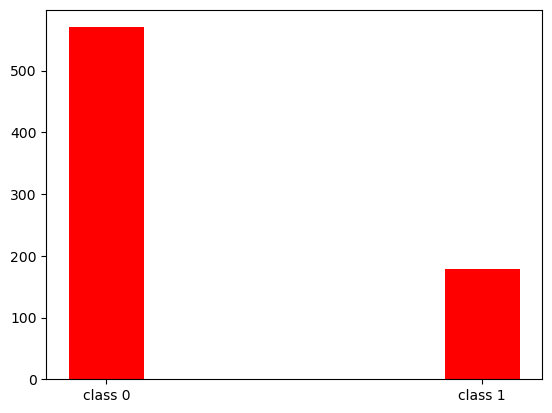

In [5]:
class0_number=np.size(tags[tags==0])
class1_number=np.size(tags[tags==1])
# plotting number of data in two different label
a=['class 0','class 1']
plot = plt.bar(a,[class0_number,class1_number],width=0.2 , color='red')

In [6]:
# normalization of data
MV_features_normalized=np.ones((features.shape))
for i in range(4):    
    MV_features_normalized[:,i]=(features[:,i]-features[:,i].mean())/features[:,i].std()
MV_features_normalized.shape

(748, 4)

## a) Logistic regression and naive bayes method and cross validation

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MV_features_normalized,tags,test_size=0.2,random_state=42)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [9]:
# cross validation
grid_param = {'C' : [0.1, 1, 10, 20], 'solver' : ['lbfgs','sag', 'saga'],'tol' :[1e-2, 1e-3, 1e-4]}
LR_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
LR_grid = GridSearchCV(estimator = LR_model, param_grid = grid_param, cv = 5)
LR_grid.fit(x_train,y_train)
best_LR_grid = LR_grid.best_estimator_

In [10]:
weights1= np.array(best_LR_grid.coef_)
bias1= best_LR_grid.intercept_
print('weights1:',weights1)
print('bias1:',bias1)

weights1: [[-0.67350987  0.35183304  0.35183304 -0.4688879 ]]
bias1: [-0.23335773]


## Naive Bayes
### Gaussian

In [11]:
from sklearn.naive_bayes import GaussianNB
# cross validation
grid_param2 = {'var_smoothing' : [1e-9, 1e-8, 1e-10, 1e-7]}
NVG_model = GaussianNB()
NVG_grid = GridSearchCV(estimator = NVG_model, param_grid = grid_param2, cv = 5)
NVG_grid.fit(x_train,y_train)
best_NVG_grid = NVG_grid.best_estimator_

### Bernoulli

In [12]:
from sklearn.naive_bayes import BernoulliNB
# cross validation
grid_param3 = {'alpha' : [0.1, 1, 10, 20], 'binarize' : [0 ,1 , 2, 3]}
NVB_model = BernoulliNB()
NVB_grid = GridSearchCV(estimator = NVB_model, param_grid = grid_param3, cv = 5)
NVB_grid.fit(x_train,y_train)
best_NVB_grid = NVB_grid.best_estimator_

##  b) f1 score, recall, and precision

In [13]:
from sklearn.metrics import recall_score,f1_score,precision_score

y_test_predicted_LR = best_LR_grid.predict(x_test) # prediction of tets data logistic regression
y_train_predicted_LR = best_LR_grid.predict(x_train) # prediction of train data logistic regression

y_test_predicted_NVG = best_NVG_grid.predict(x_test) # prediction of test data naive bayes gaussian
y_train_predicted_NVG = best_NVG_grid.predict(x_train) # prediction of train data naive bayes gaussian

y_test_predicted_NVB = best_NVB_grid.predict(x_test) # prediction of test data naive bayes bernoulli
y_train_predicted_NVB = best_NVB_grid.predict(x_train) # prediction of train data naive bayes bernoulli

precision_score_train_LR=precision_score(y_train,y_train_predicted_LR, average='macro')
precision_score_test_LR=precision_score(y_test,y_test_predicted_LR, average='macro')

precision_score_train_NVG=precision_score(y_train,y_train_predicted_NVG, average='macro')
precision_score_test_NVG=precision_score(y_test,y_test_predicted_NVG, average='macro')

precision_score_train_NVB=precision_score(y_train,y_train_predicted_NVB, average='macro')
precision_score_test_NVB=precision_score(y_test,y_test_predicted_NVB, average='macro')

recall_score_train_LR=recall_score(y_train,y_train_predicted_LR, average='macro')
recall_score_test_LR=recall_score(y_test,y_test_predicted_LR, average='macro')

recall_score_train_NVG=recall_score(y_train,y_train_predicted_NVG, average='macro')
recall_score_test_NVG=recall_score(y_test,y_test_predicted_NVG, average='macro')

recall_score_train_NVB=recall_score(y_train,y_train_predicted_NVB, average='macro')
recall_score_test_NVB=recall_score(y_test,y_test_predicted_NVB, average='macro')

f1_score_train_LR=f1_score(y_train,y_train_predicted_LR, average='macro')
f1_score_test_LR=f1_score(y_test,y_test_predicted_LR, average='macro')

f1_score_train_NVG=f1_score(y_train,y_train_predicted_NVG, average='macro')
f1_score_test_NVG=f1_score(y_test,y_test_predicted_NVG, average='macro')

f1_score_train_NVB=f1_score(y_train,y_train_predicted_NVB, average='macro')
f1_score_test_NVB=f1_score(y_test,y_test_predicted_NVB, average='macro')

print('train precision =',precision_score_train_LR)
print('train recall =',recall_score_train_LR)
print('train F1 score =',f1_score_train_LR)
print('\ntest precision =',precision_score_test_LR)
print('test recall =',recall_score_test_LR)
print('test F1 score =',f1_score_test_LR)
print('\ntrain precision =',precision_score_train_NVG)
print('train recall =',recall_score_train_NVG)
print('train F1 score =',f1_score_train_NVG)
print('\ntest precision =',precision_score_test_NVG)
print('test recall =',recall_score_test_NVG)
print('test F1 score =',f1_score_test_NVG)
print('\ntrain precision =',precision_score_train_NVB)
print('train recall =',recall_score_train_NVB)
print('train F1 score =',f1_score_train_NVB)
print('\ntest precision =',precision_score_test_NVB)
print('test recall =',recall_score_test_NVB)
print('test F1 score =',f1_score_test_NVB)

train precision = 0.6468336383129203
train recall = 0.7029812064497105
train F1 score = 0.6301725510366534

test precision = 0.6412515734580111
test recall = 0.687873714422387
test F1 score = 0.6320643642072213

train precision = 0.6272030651340996
train recall = 0.5618278318357466
train F1 score = 0.5629602374964089

test precision = 0.6376811594202898
test recall = 0.5545324085147094
test F1 score = 0.5487438003089682

train precision = 0.6648467432950191
train recall = 0.5267082576780422
train F1 score = 0.49587283103776625

test precision = 0.7585616438356164
test recall = 0.5361157617794786
test F1 score = 0.5056031641397495


### Logistic Regression

In [14]:
LR_model = LogisticRegression(C = 0.1)
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)
LR_score_recall = recall_score(y_test, y_pred)
LR_score_f1 = f1_score(y_test, y_pred)
LR_score_precision = precision_score(y_test, y_pred)

In [15]:
print(LR_score_recall)
print(LR_score_f1)

0.08108108108108109
0.13953488372093023


## Naive Bayes
### Gaussian

In [16]:
NVG_model = GaussianNB(var_smoothing=1e-8)
NVG_model.fit(x_train,y_train)
y_pred = NVG_model.predict(x_test)
NVG_score_recall = recall_score(y_test, y_pred)
NVG_score_f1 = f1_score(y_test, y_pred)
NVG_score_precision = precision_score(y_test, y_pred)

In [17]:
print(NVG_score_recall)
print(NVG_score_f1)

0.16216216216216217
0.2448979591836735


### Bernoulli

In [18]:
NVB_model = BernoulliNB(alpha = 0.1)
NVB_model.fit(x_train,y_train)
y_pred = NVB_model.predict(x_test)
NVB_score_recall = recall_score(y_test, y_pred)
NVB_score_f1 = f1_score(y_test, y_pred)
NVB_score_precision = precision_score(y_test, y_pred)

In [19]:
print(NVB_score_recall)
print(NVB_score_f1)

0.43243243243243246
0.4507042253521127


## C) Investgating about the low values of  f1 score, recall, and precision

In [20]:
print(pd.value_counts(tags))
df_new = pd.concat(([df[tags==1],df[tags==0][0:178]]))
df_new.head()

0    570
1    178
dtype: int64


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
6,2,7,1750,14,1


In [21]:
values_new=df_new.values
feature_names_new=df_new.columns
index_blood_donate=np.where(feature_names_new=='whether he/she donated blood in March 2007')
tags_new=values_new[:,index_blood_donate].reshape((values_new.shape[0],))
features_new=values_new[:,0:-1]
print(features.shape)

(748, 4)


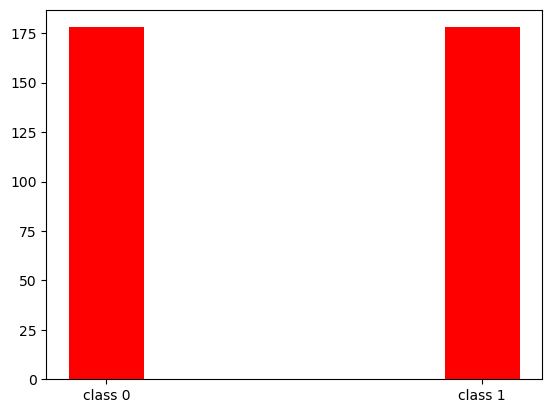

In [22]:
class0_number_new=np.size(tags_new[tags_new==0])
class1_number_new=np.size(tags_new[tags_new==1])

# plotting number of data in two different label
a=['class 0','class 1']
plot = plt.bar(a,[class0_number_new , class1_number_new],width=0.2 , color='red')

In [23]:
#normalization
MV_features_normalized_new=np.ones((features_new.shape))
for i in range(4):    
    MV_features_normalized_new[:,i]=(features_new[:,i]-features_new[:,i].mean())/features_new[:,i].std()
MV_features_normalized_new.shape

(356, 4)

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(MV_features_normalized_new , tags_new ,test_size=0.2,random_state=42)

### logistic regression

In [25]:
LR_model_new = LogisticRegression(C = 0.1)
LR_model_new.fit(X_train,Y_train)
Y_pred = LR_model_new.predict(X_test)
LR_score_recall = recall_score(Y_test, Y_pred)
LR_score_f1 = f1_score(Y_test, Y_pred)
LR_score_precision = precision_score(Y_test, Y_pred)

In [26]:
print(LR_score_recall)
print(LR_score_f1)

0.3055555555555556
0.39285714285714285


### Naive Bayes
### Gaussian

In [27]:
NVG_model_new = GaussianNB(var_smoothing=1e-8)
NVG_model_new.fit(X_train,Y_train)
Y_pred = NVG_model_new.predict(X_test)
NVG_score_recall = recall_score(Y_test, Y_pred)
NVG_score_f1 = f1_score(Y_test, Y_pred)
NVG_score_precision = precision_score(Y_test, Y_pred)

In [28]:
print(NVG_score_recall)
print(NVG_score_f1)

0.16666666666666666
0.25


In [29]:
NVB_model_new = BernoulliNB(alpha = 0.1)
NVB_model_new.fit(X_train,Y_train)
Y_pred = NVB_model_new.predict(X_test)
NVB_score_recall = recall_score(Y_test, Y_pred)
NVB_score_f1 = f1_score(Y_test, Y_pred)
NVB_score_precision = precision_score(Y_test, Y_pred)

In [30]:
grid_param_new = {'C' : [0.1, 1, 10, 20], 'solver' : ['lbfgs','sag', 'saga'],'tol' :[1e-2, 1e-3, 1e-4]}
LR_model_new1 = LogisticRegression(max_iter=10000, random_state=42)
LR_grid_new = GridSearchCV(estimator = LR_model_new1, param_grid = grid_param_new, cv = 5)
LR_grid_new.fit(X_train,Y_train)
best_LR_grid_new = LR_grid_new.best_estimator_

In [31]:
weights2= np.array(best_LR_grid_new.coef_)
bias2= best_LR_grid_new.intercept_
print('weights2:',weights2)
print('bias2:',bias2)

weights2: [[ 0.29472984  0.21996768  0.21996768 -0.19322572]]
bias2: [-0.01007945]
